#                            <font color='orange'>TP1:Analyse_Numérique</font>

### Réalisé par:Ahlem Brahmi 2DNI2

>

## <u>Exercice 2:<u>(methode de dechotomie)

On considère l'équation :$$ f(x)=x^3+x^2-3x-3=0$$1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.

2) Utiliser un programme dicho.m qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.

3) Modifier le programme dicho.m pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

### <font color='green'>corrigé:</font>

# 1)

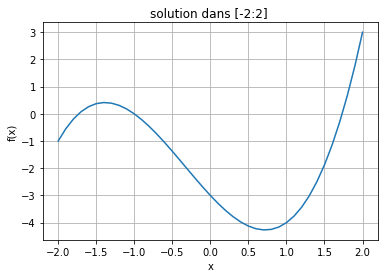

In [102]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2] ");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))

## D'aprés le graphe de **f** il existe 3 solutions :


   $\alpha_1 \in ]-2;-1.5[$


 $\alpha_2 \in ]-1.5;-0.5[$

 $\alpha_3 \in ]1.5;2[$

# 2)

In [103]:
def Dicho(a,b,f,e):
 m=(a+b)/2
   
 ecart = abs(b-a)
 while ecart>e:
        if f(a)*f(m)<0:
             b=m
        else:
            a=m
        m=(a+b)/2
        ecart = b-a
 return m


In [104]:
f=lambda x: x**3+x**2-3*x-3
print(Dicho(-2,-1.5,f,0.0001))

-1.732025146484375


# 3)

In [105]:
def Dicho(a,b,f,eps):
    m=(a+b)/2
    ecart = abs(b-a)
    n=0
    while abs(b-a)>eps:
        n+=1
        if f(a)*f(m)<0:
             b=m
        else:
            a=m
        m=(a+b)/2
    print (" nbre d'itérations nécessaires :", n )
    return m

In [106]:
Dicho(-2,-1.5,f,0.001)
Dicho(-1.5,-0.5,f,0.001)
Dicho(1.5,2,f,0.001)

 nbre d'itérations nécessaires : 9
 nbre d'itérations nécessaires : 10
 nbre d'itérations nécessaires : 9


1.73193359375

>

### <font color='red'>Conclusion:</font> 

la méthode de dichotomie permet de connaitre le
nombre d’itérations nécessaires en fonction de la précision voulue. Elle est de plus très simple à
programmer. 


Mais son inconvénient majeur réside dans l’hypothèse du départ f(a)f(b) < 0 qui laisse de
coté toutes les fonctions qui s’annulent sans changer de signe.

## <u>Exercice 3<u>:(methode de point fixe)

n considère l'équation :$$ f(x)=x^3+4x^2-10=0$$1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).

2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:

a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

c) $g_3(x)=x-x^3-4x^2+10=x$.

3) Ecrire puis appliquer une fonction Matlab que l'on appellera pointfixe.m aux trois schémas précédents en prenant >x0=1.5;eps=0.001.

4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?

### <font color='green'>Corrigé:</font>

# 1)

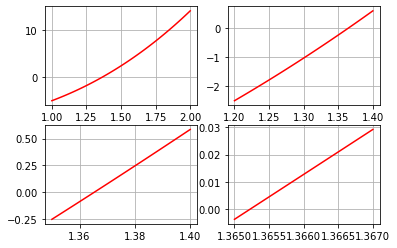

In [126]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)

# 2)

On considère l'équation :$$ f(x)=x^3+4x^2-10=0$$

**a)** $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

$$x^3+4x^2-10=0$$

$$4x^2=10-x^3$$

$$2x=\sqrt{10-x^3}$$

$$x=\frac{1}{2}\sqrt{10-x^3}$$

Donc $ f(x)=g(x)$

## Calcul symbolique de la dérivée

In [127]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g1=lambda x: 1/2*sqrt(10-x**3)

In [128]:
dg1=lambdify(x,diff(g1(x),x,1))
dg1(1.365)

### Que pouvez vous conclure à propos des convergences de g1?

**<font color='green'>Réponse:</font> g1 Converge localement car |g'(x)| < 1**

## Justification théoriques pour g2 et g3

On considère l'équation :$$ f(x)=x^3+4x^2-10=0$$

**b)** $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$$$x^3+4x^2=10$$$$x^2(x+4)=10$$$$x^2=\frac{10}{x+4}$$$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

On considère l'équation :$$ f(x)=x^3+4x^2-10=0$$**c)** $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$$$x^3+4x^2-10+x-x=0$$$$x^3-4x^2+x-x=10$$$$x^3-4x^2+x=x+10$$$$4x^2+x=x-x^3+10$$$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

# 3)

In [129]:
import math
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*(math.sqrt(10-x**3))
g2=lambda x: math.sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    zero=x0
    for i in range(nmax):
        x=zero 
        zero=g(x)
        erreur=abs(zero-x)
        print(zero)
        if erreur<eps:
            return zero,i
    print('pas de convergence avec le nombre d''iteration indique')

In [130]:
ptfixe(g2,1.5,0.001,50)

1.348399724926484
1.3673763719912828
1.364957015402487
1.3652647481134421


In [131]:

ptfixe(g1,1.5,0.001,50)

1.286953767623375
1.4025408035395783
1.3454583740232942
1.3751702528160383
1.360094192761733
1.3678469675921328
1.3638870038840212
1.36591673339004
1.364878217193677
1.365410061169957


In [132]:
ptfixe(g3,1.5,0.001,5)

-0.875
6.732421875
-469.72001200169325
102754555.18738511
-1.0849338705317464e+24
pas de convergence avec le nombre diteration indique


### Quelle est la fonction qui donne la convergence la plus rapide?

**<font color='green'>Réponse:</font> G2 la fonction qui donne la convergence la plus rapide**

# <u>Exercice 4:<u>(méthode de Newton)


1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer une fonction Matlab que l'on appellera newton.m à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .

2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

### <font color='green'>Corrigé:</font>

# 1)

In [133]:
from math import exp
from time import time
f=lambda x: exp(-x)-x
fprime=lambda x: -exp(-x)-1
def newton(a,eps):
    debut=time()
    x1=a
    x2=x1-f(x1)/fprime(x1)
    while (abs(x1-x2)>eps) :
        x1=x2
        x2=x1-(f(x1)/fprime(x1))
        fin=time()
    return x2,fin-debut

In [134]:
newton(1,0.001)

=> la méthode de newton est toujours convergente localement

# <font color='red'>Conclusion:</font>


### Toute méthode devient le meilleur selon leur cas.